In [ ]:
# Notebook: 2_exploratory_analysis.ipynb
# Author: Hope Kimandi
# Dataset: bank_additional_transformed.xlsx

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid', palette='muted')

# Load the transformed dataset
transformed_dataset_path = r'C:\Users\lenovo\OneDrive\Desktop\KEndy\ASSIGNMENTS\DSA Assignments\DSA 2040\Data mining_group project_Hope\DATA\transformed\bank_additional_transformed.xlsx'
df = pd.read_excel(transformed_dataset_path)

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,medium,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,medium,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,medium,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,medium,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,long,0


In [ ]:
# Step 1: Summary Statistics

# Descriptive statistics for numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe()

# Count of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].nunique()


job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
month                10
day_of_week           5
poutcome              3
y                     2
duration_category     4
dtype: int64

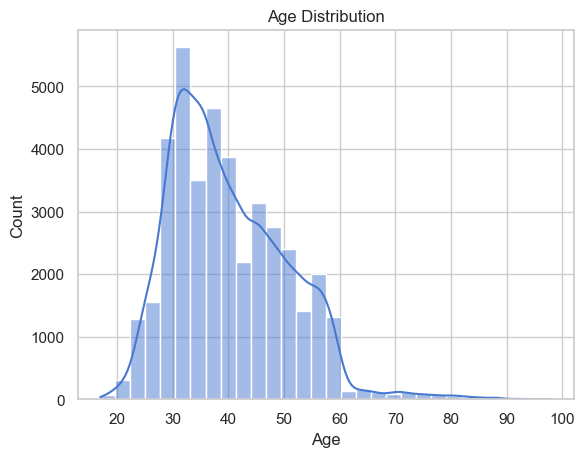

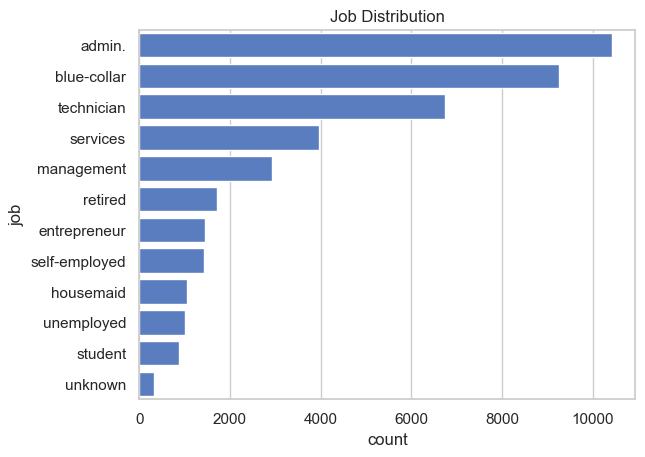

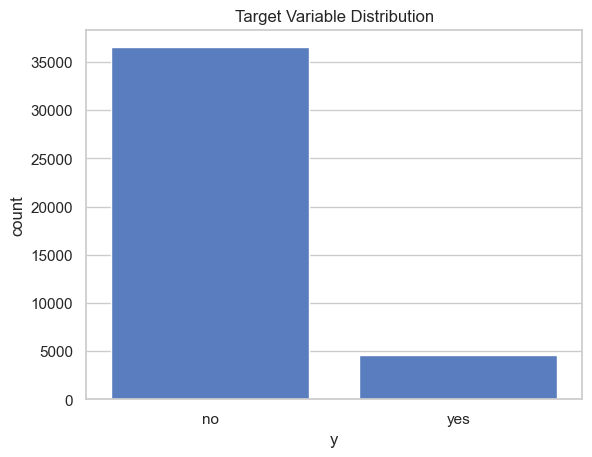

In [8]:
# Step 2: Distribution Plots

# Histogram for 'age'
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Countplot for 'job'
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.show()

# Countplot for target variable 'y'
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()

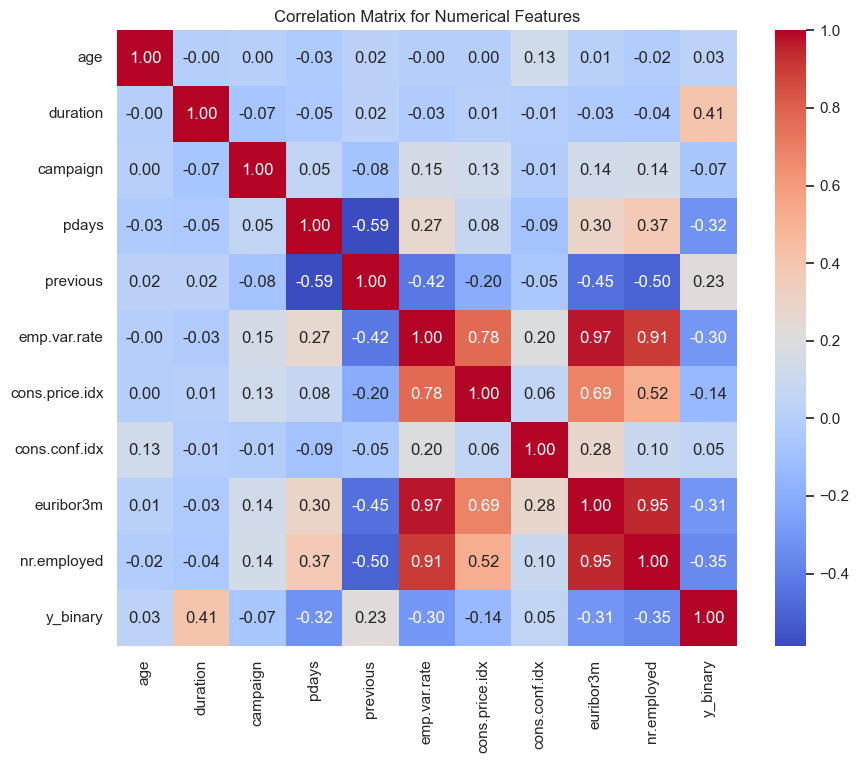

In [9]:
# Step 3: Correlation Analysis

# Correlation matrix for numerical variables
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

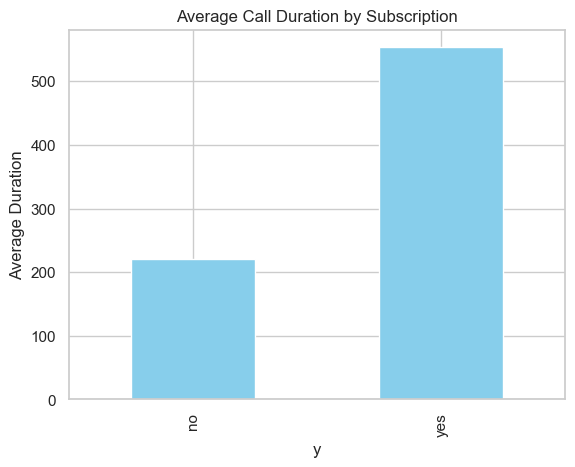

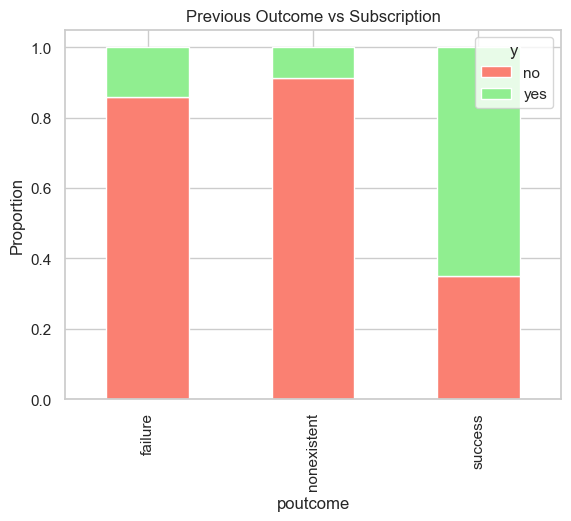

In [10]:
# Step 4: Group Comparisons

# Average duration by target variable
df.groupby('y')['duration'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Call Duration by Subscription')
plt.ylabel('Average Duration')
plt.show()

# Proportion of previous outcomes by target variable
prev_outcome_pivot = pd.crosstab(df['poutcome'], df['y'], normalize='index')
prev_outcome_pivot.plot(kind='bar', stacked=True, color=['salmon','lightgreen'])
plt.title('Previous Outcome vs Subscription')
plt.ylabel('Proportion')
plt.show()

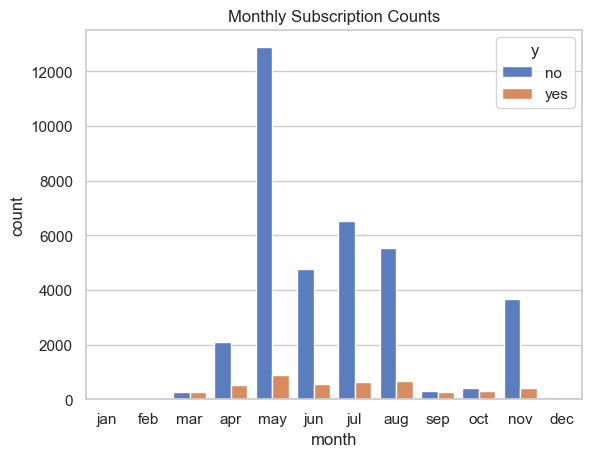

In [12]:
# Step 5: Month vs Subscription

month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(x='month', hue='y', data=df, order=month_order)
plt.title('Monthly Subscription Counts')
plt.show()
